# Master Pytorch 7 : RNN Basic
- RNN의 기초에 대해 알아보자

# RNN one Cell process

In [74]:
import torch
import torch.nn as nn

# hello에 있는 각각의 문자들을 원핫벡터로 변환
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# RNN의 한 cell 정의 후 출력
cell = nn.RNN(input_size = 4, hidden_size = 2, batch_first = True)
cell

hidden = torch.randn(1, 1, 2) # (num_layers * num_direction) X batch_size X hidden_size
hidden

inputs = torch.Tensor([h, e, l, l, o])
inputs

for p in cell.parameters():
    print(p)

for c in inputs:
    c = c.view(1, 1, -1) # input : (batch_size X seq_len X input_size) if batch_first = True
    out, hidden = cell(c, hidden)
    print(c.size(), out.size())

Parameter containing:
tensor([[-0.1846, -0.0750, -0.2294,  0.3287],
        [ 0.5021,  0.3439,  0.2003, -0.0298]], requires_grad=True)
Parameter containing:
tensor([[0.0927, 0.0048],
        [0.1965, 0.1792]], requires_grad=True)
Parameter containing:
tensor([-0.5593, -0.4830], requires_grad=True)
Parameter containing:
tensor([ 0.6956, -0.3588], requires_grad=True)
torch.Size([1, 1, 4]) torch.Size([1, 1, 2])
torch.Size([1, 1, 4]) torch.Size([1, 1, 2])
torch.Size([1, 1, 4]) torch.Size([1, 1, 2])
torch.Size([1, 1, 4]) torch.Size([1, 1, 2])
torch.Size([1, 1, 4]) torch.Size([1, 1, 2])


In [101]:
# 위 작업은 한 번에 가능하다.
# input : (Batch_size X seq_len X input_size) if batch_first == True
inputs = inputs.view(1, 5, -1) # Batch X seq_len X input_size
out, hidden = cell(inputs, hidden)
print(out.size(), hidden.size())
# sequence length = 5로 나오는데, 이것은 곧 hidden이 5개 이어져있다는 뜻

torch.Size([1, 5, 2]) torch.Size([1, 1, 2])


In [102]:
hidden = torch.randn(1, 3, 2)

# cell 한개 RNN : input_dim(4) -> output_dim(2) / seqence = 5, batch = 3
inputs = torch.Tensor([[h,e,l,l,o],
                       [e,o,l,l,l],
                       [l,l,e,e,l]])
inputs

# input : (batch, seq_len, input_size) when batch_first = True
# B X S X I
out, hidden = cell(inputs, hidden)
print(inputs.size(), out.size())
out

torch.Size([3, 5, 4]) torch.Size([3, 5, 2])


tensor([[[ 0.6540,  0.6208],
         [-0.4761,  0.1474],
         [ 0.2029,  0.7809],
         [-0.2389,  0.6493],
         [-0.0829,  0.4370]],

        [[ 0.3680,  0.5645],
         [-0.2038,  0.3990],
         [ 0.0266,  0.7347],
         [-0.1755,  0.6691],
         [-0.0958,  0.6927]],

        [[-0.0191,  0.8242],
         [-0.2008,  0.6568],
         [-0.2988,  0.2344],
         [-0.1017,  0.3621],
         [ 0.0155,  0.7343]]], grad_fn=<TransposeBackward0>)

# RNN Example

In [194]:
import torch
import torch.nn as nn

torch.manual_seed(777)

idx2char = ['h', 'i', 'e', 'l', 'o']

# hihell -> ihello로 가르쳐보자
x_data = [0, 1, 0, 2, 3, 3] # hihell
one_hot_lookup = [[1, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 1]]

y_data = [1, 0, 2, 3, 3, 4] # ihello
x_one_hot = [one_hot_lookup[x] for x in x_data]
x_one_hot # hihell에 대한 one-hot 벡터

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0]]

In [195]:
# 데이터 준비
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data).view(6,1)
print(inputs)
print(labels)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])
tensor([[1],
        [0],
        [2],
        [3],
        [3],
        [4]])


In [196]:
class_n = 5
input_size = 5 # one-hot 벡터의 사이즈
hidden_size = 5 # hidden 레이어의 사이즈
batch_size = 1 # 한 문장
sequence_length = 1 # 한 글자당 하나씩
layer_n = 1 # one-layer RNN

class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, batch_first = True)
        
    def forward(self, hidden, x):
        
        x = x.view(batch_size, sequence_length, input_size) # Reshape input(batch_first = True)
        
        out, hidden = self.rnn(x, hidden)
        return hidden, out.view(-1, class_n)
    
    def init_hidden(self):
        
        return torch.zeros(layer_n, batch_size, hidden_size)
    
model = Model()
print(model)

Model(
  (rnn): RNN(5, 5, batch_first=True)
)


In [197]:
import torch.optim as optim
import sys

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.1)

epoch_n = 100



for epoch in range(1, epoch_n+1):
    
    optimizer.zero_grad()
    loss = 0
    hidden = model.init_hidden() # 초기값 설정(h0)
    
    sys.stdout.write("predicted string: ")
    for input, label in zip(inputs, labels):
        # print(input.size(), label.size())
        hidden, output = model(hidden, input)
        val, idx = output.max(1) # 최대값(val)과 index(idx) 출력
        sys.stdout.write(idx2char[idx.data[0]])
        loss += loss_function(output, label)
        
        
    print(' Epoch : %d/100, Loss : %1.3f' %(epoch, loss.data[0])) 
        
    loss.backward()
    optimizer.step()


predicted string: llllll Epoch : 1/100, Loss : 10.155
predicted string: llllll Epoch : 2/100, Loss : 9.137
predicted string: llllll Epoch : 3/100, Loss : 8.355
predicted string: llllll Epoch : 4/100, Loss : 7.577
predicted string: llllll Epoch : 5/100, Loss : 6.876
predicted string: lhelll Epoch : 6/100, Loss : 6.327
predicted string: ihelll Epoch : 7/100, Loss : 6.014
predicted string: ihelll Epoch : 8/100, Loss : 5.787
predicted string: ihelll Epoch : 9/100, Loss : 5.477
predicted string: ihelll Epoch : 10/100, Loss : 5.274
predicted string: ihelll Epoch : 11/100, Loss : 5.041
predicted string: ihello Epoch : 12/100, Loss : 4.827
predicted string: ihello Epoch : 13/100, Loss : 4.676
predicted string: ihello Epoch : 14/100, Loss : 4.550
predicted string: ihello Epoch : 15/100, Loss : 4.430
predicted string: ihello Epoch : 16/100, Loss : 4.305
predicted string: ihello Epoch : 17/100, Loss : 4.164
predicted string: ihelll Epoch : 18/100, Loss : 4.003
predicted string: ihelll Epoch : 19/

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


predicted string: ihello Epoch : 36/100, Loss : 3.020
predicted string: ihello Epoch : 37/100, Loss : 3.015
predicted string: ihello Epoch : 38/100, Loss : 2.998
predicted string: ihello Epoch : 39/100, Loss : 2.977
predicted string: ihello Epoch : 40/100, Loss : 2.966
predicted string: ihello Epoch : 41/100, Loss : 2.961
predicted string: ihello Epoch : 42/100, Loss : 2.950
predicted string: ihello Epoch : 43/100, Loss : 2.930
predicted string: ihello Epoch : 44/100, Loss : 2.904
predicted string: ihello Epoch : 45/100, Loss : 2.888
predicted string: ihello Epoch : 46/100, Loss : 2.888
predicted string: ihello Epoch : 47/100, Loss : 2.879
predicted string: ihello Epoch : 48/100, Loss : 2.860
predicted string: ihello Epoch : 49/100, Loss : 2.857
predicted string: ihello Epoch : 50/100, Loss : 2.859
predicted string: ihello Epoch : 51/100, Loss : 2.852
predicted string: ihello Epoch : 52/100, Loss : 2.840
predicted string: ihello Epoch : 53/100, Loss : 2.834
predicted string: ihello Epo

# 스스로 해보기
- "hihello"에서 "hihell"를 입력값으로 한 후 'o'를 예측하자

# 데이터 생성

In [101]:
import torch
import torch.nn as nn

idx2char = ['h', 'i', 'e', 'l', 'o']

h = [1,0,0,0,0]
i = [0,1,0,0,0]
e = [0,0,1,0,0]
l = [0,0,0,1,0]
o = [0,0,0,0,1]

x_data = [h,i,h,e,l,l]
y_data = [i,h,e,l,l,o]

inputs = torch.Tensor(x_data)
labels = torch.LongTensor([1, 0, 2, 3, 3, 4]).view(6, 1) # index2char

print(inputs)
print(labels)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])
tensor([[1],
        [0],
        [2],
        [3],
        [3],
        [4]])


In [102]:
class_n = 5
input_size = 5
hidden_size = 5
batch_size = 1
seq_n = 1
layer_n = 1

class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size,
                         batch_first = True)
        
    def forward(self, x, hidden):
        
        x = x.view(batch_size, seq_n, input_size)
        out, hidden = self.rnn(x, hidden)
        
        return out.view(-1, class_n), hidden
    
    def init_hidden(self):
        
        return torch.zeros(layer_n, batch_size, hidden_size)

model = Model()
print(model)

Model(
  (rnn): RNN(5, 5, batch_first=True)
)


In [103]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

epoch_n = 100
loss_list = []
for epoch in range(1, epoch_n + 1):
    
    optimizer.zero_grad()
    hidden = model.init_hidden()
    loss = 0
    
    for input, label in zip(inputs, labels):
        output, hidden = model(input, hidden)
        
        val, idx = output.max(1)
        if epoch % 10 == 0:
            print(idx2char[idx.data[0]], end = '')
        
        loss += loss_function(output, label)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(' Epoch : %d/100, Loss : %1.3f' %(epoch, loss))
    loss_list.append(loss)

ehllll Epoch : 10/100, Loss : 7.883
ihelll Epoch : 20/100, Loss : 6.278
ihello Epoch : 30/100, Loss : 5.075
ihello Epoch : 40/100, Loss : 4.319
ihello Epoch : 50/100, Loss : 3.864
ihello Epoch : 60/100, Loss : 3.590
ihello Epoch : 70/100, Loss : 3.418
ihello Epoch : 80/100, Loss : 3.305
ihello Epoch : 90/100, Loss : 3.226
ihello Epoch : 100/100, Loss : 3.168


# Loss 시각화

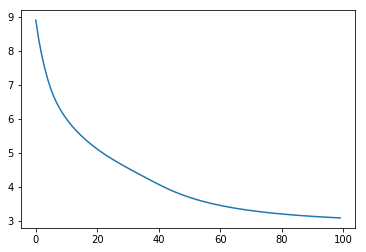

In [293]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list)

# 한글 버젼
- "내가 사랑하는 사람"에서 마지막 '사람' 맞추기

In [1]:
from konlpy.tag import Okt
import torch

# POS 태깅 함수
okt = Okt()

# POS 태깅 적용
my_string = '내가 사랑하는 사람'
tokens = okt.pos(my_string)

# 사용된 모든 글자 모음
letters = [val for val, tag in tokens] + [' ']
print(letters)

# 글자를 Tensor로 변환하는 사전 생성
letter2tensor = {}
for i, val in enumerate(letters):
    tensor = torch.zeros(1, len(letters))
    tensor[0][i] = 1
    letter2tensor[val] = tensor

letter2tensor

['내', '가', '사랑', '하는', '사람', ' ']


{' ': tensor([[0., 0., 0., 0., 0., 1.]]),
 '가': tensor([[0., 1., 0., 0., 0., 0.]]),
 '내': tensor([[1., 0., 0., 0., 0., 0.]]),
 '사람': tensor([[0., 0., 0., 0., 1., 0.]]),
 '사랑': tensor([[0., 0., 1., 0., 0., 0.]]),
 '하는': tensor([[0., 0., 0., 1., 0., 0.]])}

In [2]:
x_data = ['내', '가', ' ', '사랑', '하는', ' '] # 입력값
y_data = [1, 5, 2, 3, 5, 4] # 출력값, letters의 index값으로 label 생성(CorssEntropyLoss 함수 쓸 때 index값으로 넣어줌)

labels = torch.LongTensor(y_data).view(6, 1)
inputs = torch.zeros(len(x_data), len(letters)) # x_data를 Tensor로 변환(위에 만든 사전 이용해서)
for i, val in enumerate(x_data):
    inputs[i] = letter2tensor[val]

print(inputs)
print(labels)

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])
tensor([[1],
        [5],
        [2],
        [3],
        [5],
        [4]])


In [16]:
import torch.nn as nn

class_n = 6 # 분류되는 개수, 우리가 가지고 있는 letters의 개수가 6개이기 때문에 class는 6(6개 중 하나로 인식돼야하니까)
input_size = 6 # input의 길이, inputs = (1 X 1 X 6)
hidden_size = 6 # hidden layer의 size
batch_size = 1 
seq_n = 1
layer_n = 1

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size,
                         batch_first = True)
        
    def forward(self, x, hidden):
        
        x = x.view(batch_size, seq_n, input_size)
        
        output, hidden = self.rnn(x, hidden)
        
        return output.view(-1, class_n), hidden
    
    def init_hidden(self):
        
        return torch.zeros(layer_n, batch_size, hidden_size)
    
model = Model()
print(model)   

Model(
  (rnn): RNN(6, 6, batch_first=True)
)


In [17]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

epoch_n = 30

for epoch in range(epoch_n):
    optimizer.zero_grad()
    hidden = model.init_hidden()
    loss = 0
    
    for input, label in zip(inputs, labels):
        output, hidden = model(input, hidden)
        loss += loss_function(output, label)
        
        val, idx = output.max(1)
        print(letters[idx.data[0]], end = '')
        
    loss.backward()
    optimizer.step()
    
    print('\tEpoch ; %d/100, Loss : %1.3f' %(epoch, loss))
    loss = 0

가가 가가가	Epoch ; 0/100, Loss : 11.046
가     	Epoch ; 1/100, Loss : 9.934
가     	Epoch ; 2/100, Loss : 9.249
가     	Epoch ; 3/100, Loss : 8.801
가     	Epoch ; 4/100, Loss : 8.479
가     	Epoch ; 5/100, Loss : 8.221
가     	Epoch ; 6/100, Loss : 7.995
가  하는  	Epoch ; 7/100, Loss : 7.785
가  하는  	Epoch ; 8/100, Loss : 7.583
가 사랑하는 사람	Epoch ; 9/100, Loss : 7.385
가 사랑하는 사람	Epoch ; 10/100, Loss : 7.192
가 사랑하는 사람	Epoch ; 11/100, Loss : 7.005
가 사랑하는 사람	Epoch ; 12/100, Loss : 6.825
가 사랑하는 사람	Epoch ; 13/100, Loss : 6.655
가 사랑하는 사람	Epoch ; 14/100, Loss : 6.495
가 사랑하는 사람	Epoch ; 15/100, Loss : 6.346
가 사랑하는 사람	Epoch ; 16/100, Loss : 6.207
가 사랑하는 사람	Epoch ; 17/100, Loss : 6.079
가 사랑하는 사람	Epoch ; 18/100, Loss : 5.961
가 사랑하는 사람	Epoch ; 19/100, Loss : 5.850
가 사랑하는 사람	Epoch ; 20/100, Loss : 5.748
가 사랑하는 사람	Epoch ; 21/100, Loss : 5.652
가 사랑하는 사람	Epoch ; 22/100, Loss : 5.562
가 사랑하는 사람	Epoch ; 23/100, Loss : 5.477
가 사랑하는 사람	Epoch ; 24/100, Loss : 5.397
가 사랑하는 사람	Epoch ; 25/100, Loss : 5.321
가 사랑하는 사람	Epoch ; 26

# 새로 배운 것

## 1. nn.rnn(batch_first = True)
 - batch_first가 True일 땐 input과 output이 batch로 만들어진다.
 - batch_first – If True, then the input and output tensors are provided as (batch, seq, feature). Default: False

# 오류

1. untimeError: invalid argument 2: size '[1 x 1 x 6]' is invalid for input with 4 elements at ..\aten\src\TH\THStorage.cpp:84
 - output size와 hidden size의 크기가 같아야 하나? 그런 것 같다.